# M² and Beam Quality Parameters

**Scott Prahl**

**Sept 2023**

In this notebook, the basic definitions of the beam waist, beam divergence, beam product, and M² are introduced.

As Ross points out in his book, *Laser Beam Quality Metrics*, describing a laser beam by a few numbers is an approximation that discards quite a lot of information.

> Any attempt to reduce the behavior of a seven-dimensional object to a single number inevitably results in loss of information.

where the seven dimensions consist of three-amplitude, three-phase, and time.  Nevertheless, M² is a simple, widely-used metric for characterizing laser beams.

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite
    await piplite.install("laserbeamsize")

import laserbeamsize as lbs

## Minimum Beam Radius

The minimum beam radius $w_0$ (and its location $z_0$) tell us a lot about a laser beam.  We know that a laser beam must have a minimum beam radius somewhere.  If we assume that the beam obeys Gaussian beam propagation rules then we can make a few observations.

> It would seem that $w$ should stand for *width*, but it doesn't.  This means that $w$ is not the diameter but the radius.  Go figure.

A laser cavity with a flat mirror will have minimum beam radius at that mirror.  For diode lasers, beam exits through a cleaved flat surface.  Since the gain medium in a diode laser usually has a rectangular cross section, there are two different minimum beam radii associated with the exit aperture.  These are often assumed to correspond to the dimensions of the gain medium.  

In general, though, the beam waist happens somewhere inside the laser and both its location and radius is unknown.  To determine the beam waist an aberration-free focusing lens is used to create an new beam waist external to the cavity that can be measured.

## Gaussian Beam Radius

The parameter $w(z)$ represents the beam radius at an axial location $z$. When $z = z_0$, the beam reaches its minimum radius $w_0$,

$$
w^2(z)=w_0^2\left[1+\left(\frac{z-z_0}{z_R}\right)^2\right]
$$
where $z_R=\pi w_0^2/\lambda M^2$.

Therefore, for a simple gaussian beam M²=1, the minimum radius $w_0$ and its location $z_0$ determine the beam size everywhere (assuming, of course, that the wavelength is known).  

As can be seen in the plot below, the beam reaches a minimum and then expands symmetrically about the axial location of the minimum.

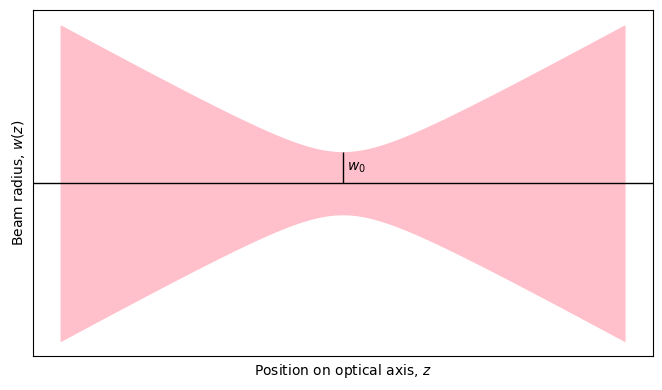

In [2]:
w0 = 0.1e-3  # radius of beam waist [m]
lambda0 = 632.8e-9  # wavelength again in m
zR = lbs.z_rayleigh(w0, lambda0)  # Rayleigh Distance in m

z = np.linspace(-5 * zR, 5 * zR, 100)
r = lbs.beam_radius(w0, lambda0, z)
plt.fill_between(z, -r, r, color="pink")

plt.axhline(0, color="black", lw=1)
plt.vlines(0, 0, w0, color="black", lw=1)
plt.text(0, w0 / 2, " $w_0$", va="center")
plt.xlabel("Position on optical axis, $z$")
plt.ylabel("Beam radius, $w(z)$")

plt.xticks([])
plt.yticks([])
plt.show()

## Beam Divergence $\Theta$

All beams diverge or spread out as the beam propagates along the $z$ direction.  The far-field divergence is defined as the half-angle

$$
\theta=\lim_{z\rightarrow\infty}\frac{w(z)}{z} = \frac{w_0}{z_R}
$$

where $w(z)$ is the beam radius at a distance $z$.  The full angle $\Theta$ is

$$
\Theta=\lim_{z\rightarrow\infty}\frac{d(z)}{z}= \frac{2 w_0}{z_R}
$$

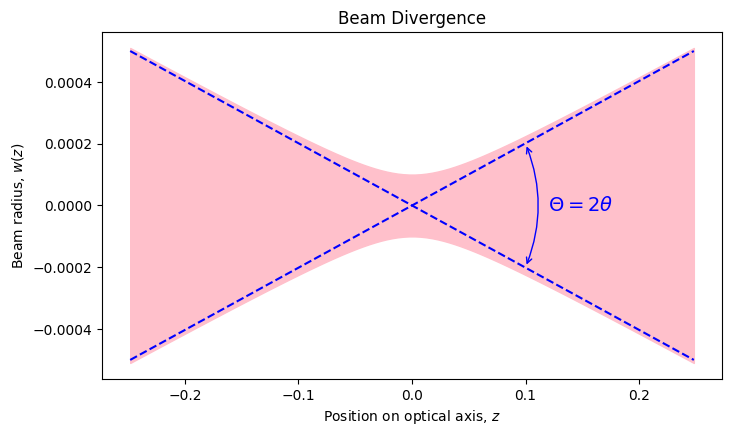

In [3]:
w0 = 0.1e-3  # radius of beam waist [m]
lambda0 = 632.8e-9  # wavelength again in m
zR = lbs.z_rayleigh(w0, lambda0)  # Rayleigh Distance in m

theta = w0 / zR
z = np.linspace(-5 * zR, 5 * zR, 100)
r = lbs.beam_radius(w0, lambda0, z)
plt.fill_between(z, -r, r, color="pink")

plt.plot(z, theta * z, "--b")
plt.plot(z, -theta * z, "--b")

plt.xlabel("Position on optical axis, $z$")
plt.ylabel("Beam radius, $w(z)$")
plt.title("Beam Divergence")

plt.text(120e-3, 0e-3, r"$\Theta=2\theta$", fontsize=14, va="center", color="blue")
plt.annotate(
    "",
    xy=(100e-3, 0.2e-3),
    xytext=(100e-3, -0.2e-3),
    arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color="blue"),
)
# plt.xticks([])
# plt.yticks([])
plt.show()

For a perfect Gaussian beam, the half-angle beam divergence is completely determined by its minimum beam radius $w_{00}$

$$
\theta_{00} = \frac{\lambda}{\pi w_{00}}
$$

where the 00 subscript indicates that these only apply to the TEM$_{00}$ or fundamental gaussian mode.

## Beam Parameter Product

Laser beam quality can be described by combining the previous two metrics into a single beam parameter product (BPP) or

$$
\mathrm{BPP} = w \cdot \theta
$$

where $w$ is the radius of the beam (at its waist/narrowest point) and $\theta$ is the half-angle measure of the beam divergence in the far-field.

This is not unlike the throughput parameter (area $\times$ solid angle) from radiometry which captures both the angular expansion of light and focusing into a single variable.  The BPP represents, for instance, the amount of light that can be coupled into a fiber.  For practical use of the BPP, see

Wang, [Fiber coupled diode laser beam parameter product calculation and rules for optimized design](https://www.researchgate.net/publication/253527159_Fiber_Coupled_Diode_Laser_Beam_Parameter_Product_Calculation_and_Rules_for_Optimized_Design), *Proc. SPIE*, **7918**, 9 (2011)



## M² or the beam propagation factor

It turns out that real beams differ from perfect Gaussian beams.  Specifically, they diverge more quickly or don't focus to the same size spot.

The beam propagation factor M² is a measure of how close a beam is to Gaussian (TEM$_{00}$ mode).

Johnston and Sasnett write in their chapter "Characterization of Laser Beams: The M² Model" in the *Handbook of Optical and Laser Scanning*, Marcel Dekker, (2004)::

> Unlike the fundamental mode beam where the 1/e$^2$-diameter definition is universally understood and applied, for mixed modes a number of different diameter definitions have been employed. The different definitions have in common that they all reduce to the 1/e$^2$-diameter when applied to an $M^2=1$ fundamental mode beam, but when applied to a mixed mode with higher order mode content, they in general give different numerical values. As M² always depends on a product of two measured diameters, its numerical value changes also as the square of that for diameters. It is all the same beam, but different methods provide results in different currencies; one has to specify what currency is in use and know the exchange rate.

M² is defined as the ratio of the beam parameter product (BPP)

$$
M^2 = \frac{\mathrm{BPP}}{\mathrm{BPP}_{00}} = \frac{\theta \cdot w_0}{\theta_{00}\cdot w_{00}}
$$

where $\theta$ is the far-field half-angle beam divergence and $w_0$ is the minimum beam radius of the real beam. The half-angle beam divergence of a perfect Gaussian is

$$
\theta_{00} = \frac{\lambda}{\pi w_{00}}
$$

and therefore the beam quality factor becomes

$$
M^2 =  \frac{\pi \cdot \theta \cdot w_0}{\lambda}
$$

where radius $w_0$ is the minimum radius for the real beam.  

A Gaussian beam has M²=1, while all other beams will have M²>1.  Moreover,

* for a given *beam radius*, the Gaussian beam has the smallest possible beam divergence
* for a given *beam divergence*, the Gaussian beam has the smallest possible beam radius. 

A multimode beam has a beam waist which is M² times larger than a fundamental Gaussian beam with the same beam divergence, or a beam divergence which is M² times larger than that of a fundamental Gaussian beam with the same beam waist.

### Astigmatic or Elliptical Beams

A simple stigmatic beam has rotational symmetry — any cross section will display a circular profile.  However, a simple astigmatic beam will have elliptical cross-sections.  It is *simple* because the major and minor axes of the ellipse remain in the same plane (a general astigmatic beam will have elliptical cross-sections that rotate with propagation distance).  

For an elliptical beam, the beam waist radius, beam waist location, and Rayleigh distance will differ on the semi-major and semi-minor axes.  Unsurprisingly, the M² values may differ as well

$$
w_x^2(z) = w_{0x}^2\left[1 + \left(\frac{z-z_0}{z_{Rx}} \right)^2\right]
$$

and

$$
w_y^2(z) = w_{0y}^2\left[1 + \left(\frac{z-z_0}{z_{Ry}} \right)^2\right]
$$

Two different M² values for the major and minor axes of the elliptical beam shape arise from the two Rayleigh distances

$$
z_{Rx} = \frac{\pi w_{0x}^2}{\lambda M_x^2} \qquad\mbox{and}\qquad z_{Ry} = \frac{\pi w_{0y}^2}{\lambda M_y^2}
$$

## Rayleigh Distance $z_R$

The Rayleigh distance $z_R$ is the distance from the beam waist to the point where the beam area has doubled.  This means that the irradiance (power/area) has dropped 50% or that beam radius has increased by a factor of $\sqrt{2}$.

Interestingly, the radius of curvature of the beam is largest at one Rayleigh distance from the beam waist.

The Rayleigh distance for a real beam defined as

$$
z_R=\frac{\pi w_0^2}{\lambda M^2}
$$

where $w_0$ is the minimum beam radius of the beam.  

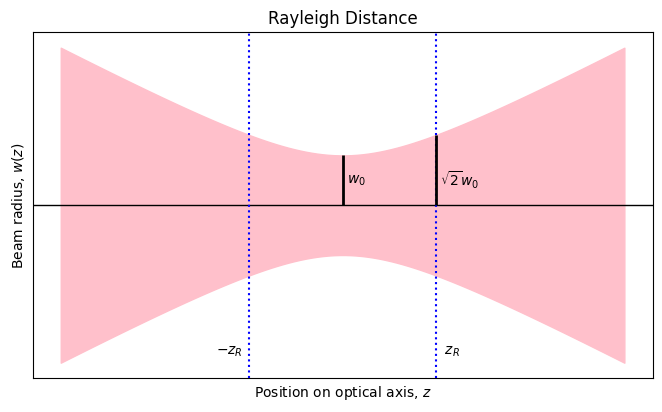

In [4]:
w0 = 0.1  # radius of beam waist [mm]
lambda0 = 0.6328 / 1000  # again in mm
zR = lbs.z_rayleigh(w0, lambda0)  # Rayleigh Distance

theta = w0 / zR
z = np.linspace(-3 * zR, 3 * zR, 100)
r = lbs.beam_radius(w0, lambda0, z)
plt.fill_between(z, -r, r, color="pink")

plt.axhline(0, color="black", lw=1)
# plt.axvline(z0,color='black',lw=1)
plt.axvline(zR, color="blue", linestyle=":")

plt.axvline(-zR, color="blue", linestyle=":")

plt.text(zR, -3 * w0, "  $z_R$")
plt.text(-zR, -3 * w0, "$-z_R$  ", ha="right")
plt.text(0, w0 / 2, " $w_0$", va="center")

plt.text(zR, w0 / 2, r" $\sqrt{2}w_0$", va="center")
plt.vlines(0, 0, w0, color="black", lw=2)
plt.vlines(zR, 0, np.sqrt(2) * w0, color="black", lw=2)
plt.xlabel("Position on optical axis, $z$")
plt.ylabel("Beam radius, $w(z)$")
plt.title("Rayleigh Distance")

plt.xticks([])
plt.yticks([])
plt.show()